# Домашняя работа №1
Произведем изначальную инициализацию

In [1]:
import numpy as np
import cmath
import time
import random as rnd
from timeit import default_timer as timer

# visualization
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

cos = np.cos
sin = np.sin
ln = np.log
sqrt = np.sqrt


# unimodal
def f1(x: float):
    """f1"""
    return x * x / 2 + 2 * x - 3, x


# unimodal
def f1_np(x: float):
    """f1"""
    return x ** 2 / 2 + 2 * x - 3, x


# unimodal
def f4(x: float):
    """f4"""
    return -(16 * x ** 2 - 24 * x + 5) * np.e ** (-x), 0

# unimodal
def f4_np(x):
    """f4_np"""
    return -(16 * x ** 2 - 24 * x + 5) * np.exp(-x), 0


def f13(x: float):
    """f13"""
    return -(x ** (2 / 3)) - (1 - x ** 2) ** (1 / 3), 0


def f13_np(x):
    """f13_np"""
    return -np.power(x, 2 / 3) - np.power(1 - x ** 2, 1 / 3), 0

Протестируем метод Брента на 3 унимодальных функциях:

$f_1(x) = x^2 + 2x - 3$

$f_2(x)=-(16x^2 - 24x + 5)e^{-x}$

$f_3(x) = -x ^{\frac{2}{3}}-(1 - x^2)^{\frac{1}{3}}$.

Их графики:

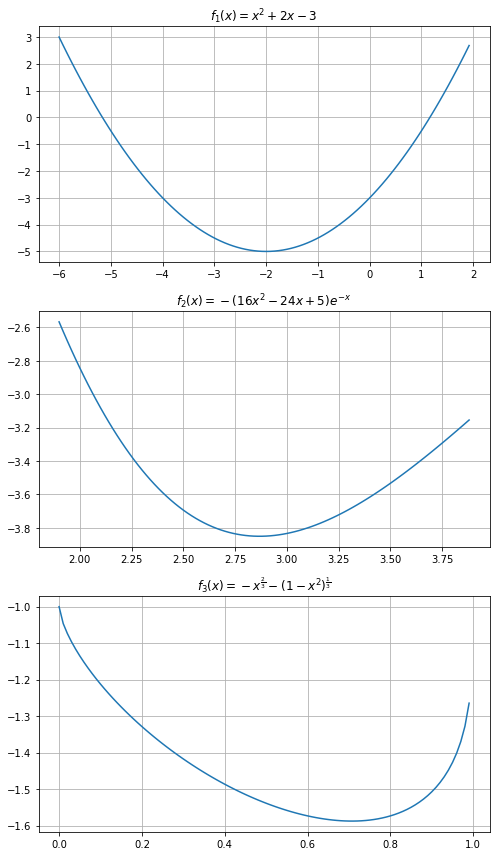

In [2]:
bounds = [(-6, 2), (1.9, 3.9), (0, 1)]
f = [f1_np, f4_np, f13_np]
x, y = [], []
sz = len(f)

for i in range(sz):
    x.append(np.arange(bounds[i][0], bounds[i][1], abs(bounds[i][1] - bounds[i][0]) / 100))
    y.append(f[i](x[-1])[0])

f_names = [r'$f_1(x) = x^2 + 2x - 3$', r'$f_2(x)=-(16x^2 - 24x + 5)e^{-x}$', r'$f_3(x) = -x ^{\frac{2}{3}}-(1 - x^2)^{\frac{1}{3}}$']
    
plt.figure(figsize=(7, 12))
for i in range(sz):
    plt.subplot(int(f'31{i + 1}'))
    plt.plot(x[i], y[i])
    plt.title(f_names[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

Перечислим минимумы функций, в которые мы будем пыться сойтись: $x_1^*=-2$, $x_2^*=2.868034$ $x_3^*=0.70711$. Нарисуем графики зависимости $\log|x - x^*|$ от числа итераций. Для поиска минимума используется алгоритма Брента, который гарантирует сходимость в глобальный минимум для унимодальных функций.

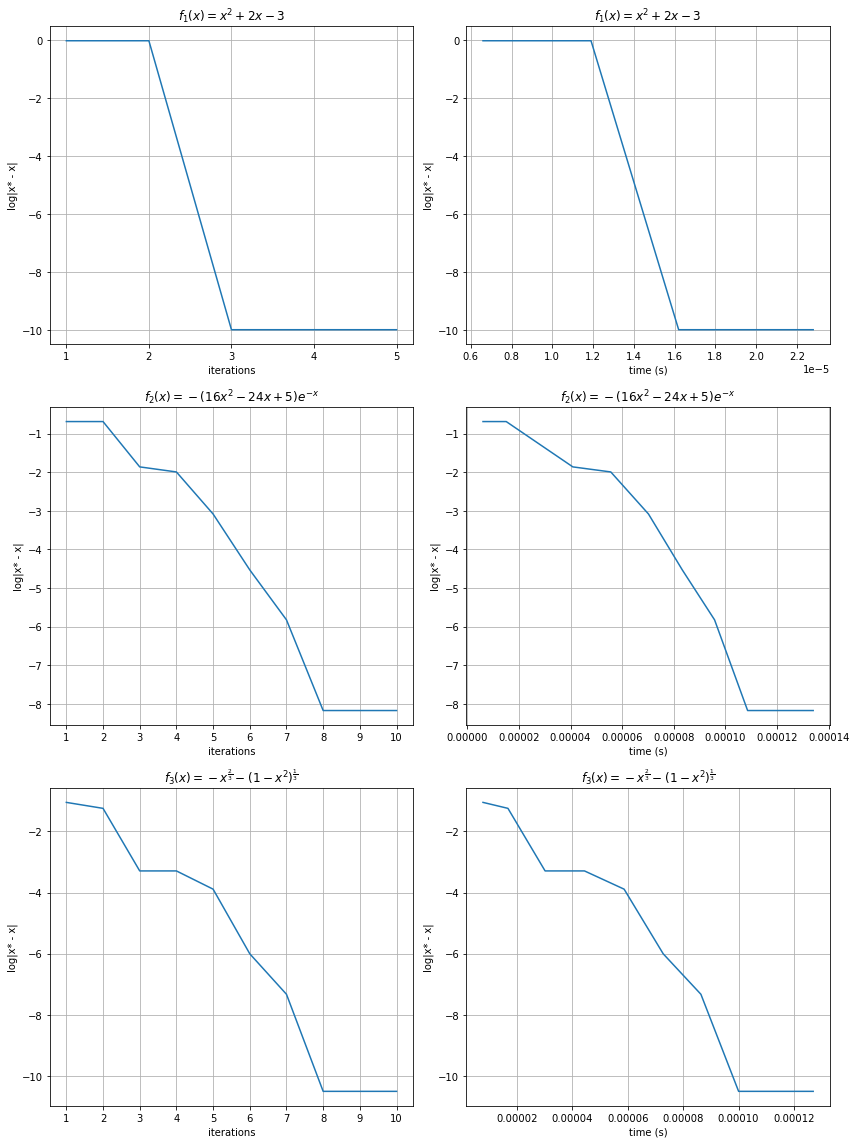

In [3]:
def brent(oracle, a: float, b: float, x_true: float, eps: float = 1e-8):
    K = 0.381966
    x, w, v = a + K * (b - a), a + K * (b - a), a + K * (b - a)
    d, d2 = (b - a) * K, 0
    fx = oracle(x)[0]
    fw, fv = fx, fx
    it = []
    start_time = timer()
    tms = []
    for i in range(50):
        mid = (a + b) / 2
        tol1 = eps * abs(x) + eps / 10
        tol2 = tol1 * 2
        if abs(x - mid) < tol2 - (b - a) / 2:
            break
        p, q, r = 0, 0, 0
        if abs(d2) > tol1:
            r = (x - w) * (fx - fv)
            q = (x - v) * (fx - fw)
            p = (x - v) * q - (x - w) * r
            q = 2 * (q - r)
            if q > 0:
                p = -p
            else:
                q = -q
            r = d2
            d2 = d
        if abs(p) < abs(0.5 * q * r) and p > q * (a - x) and p < q * (b - x):
            # parabolic interpolation
            d = p / q
            u = x + d
            # f should not be evaluated close to a and b
            if u - a < tol2 or b - u < tol2:
                d = tol1 if x < mid else -tol1
        else:
            # golden section step
            d2 = (b if x < mid else a) - x
            d = K * d2
        # f should not be evaluated close to x
        u = x
        if abs(d) > tol1:
            u += d
        elif d > 0:
            u += tol1
        else:
            u -= tol1

        fu = oracle(u)[0]

        if fu < fx:
            # we found a better point
            if u > x:
                a = x
            else:
                b = x
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, fu
        else:
            # the point is not that good but may be it's at least better the the other two points
            if u < x:
                a = u
            else:
                b = u
            if fu < fw or abs(w - x) < eps:
                # if it's the second best
                v, w = w, u
                fv, fw = fw, fu
            elif fu < fv or abs(v - x) < eps or abs(v - w) < eps:
                # if it's the third best
                v = u
                fv = fu
        it.append(abs(x - x_true))
        tms.append(timer() - start_time)
    return x, it, tms


x_true = [-2 + 1e-10, 2.868034 + 1e-10, 1 / sqrt(2) + 1e-10]
log_err = []
iters = []
tms = []
for i in range(sz):
    res = brent(f[i], bounds[i][0], bounds[i][1], x_true[i])
    err, tm = res[1], res[2]
    log_err.append(np.log10(err))
    tms.append(tm)
    iters.append([*range(1, log_err[i].shape[0] + 1)])

f_labels = []
plt.figure(figsize=(12, 16))
for i in range(sz):
    plt.subplot(int(f'{sz}2{2 * i + 1}'))
    plt.plot(iters[i], log_err[i])
    plt.title(f_names[i])
    plt.grid(True)
    plt.xticks(iters[i])
    plt.xlabel('iterations')
    plt.ylabel('log|x* - x|')
    
    
    plt.subplot(int(f'{sz}2{2 * i + 2}'))
    plt.plot(tms[i], log_err[i])
    plt.title(f_names[i])
    plt.grid(True)
    plt.xlabel('time (s)')
    plt.ylabel('log|x* - x|')

plt.tight_layout()
plt.show()

Как и ожидалось, на унимодальных функциях метод Брента сошелся в глобальный минимум, причем достаточно быстро. График времени по своему виду идентичен графику итераций по той причине, что каждая итерация занимала одинаковое количество времени и время обращения к оракулу никак не зависило от точки вычисления.

Теперь посмотрим как метод будет вести себя на неунимодальных функциях:

$f_4(x) = -(1.4 - 3x)sin(18x)$

$f_5(x) = sin(x) + sin(\frac{10}{3}x) + log(x) - 0.84x + 3$. 

Построим их графики на отрезках (0, 1.2) и (2.7, 7.5), соответственно.

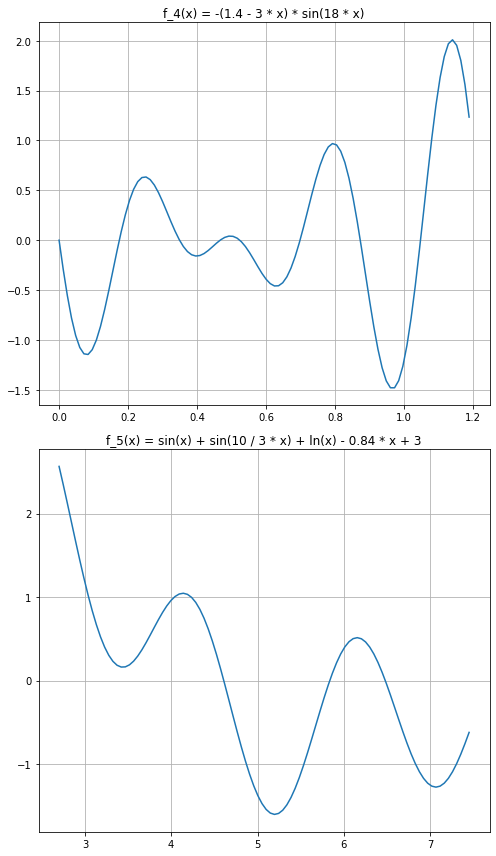

In [4]:
# not unimodal, local minimum
def f5(x):
    return -(1.4 - 3 * x) * sin(18 * x), 0

# not unimodal, global minimum
def f7(x):
    return sin(x) + sin(10 / 3 * x) + ln(x) - 0.84 * x + 3, 0



bounds = [(0, 1.2), (2.7, 7.5)]
f = [f5, f7]
x, y = [], []

sz = len(f)
for i in range(sz):
    x.append(np.arange(bounds[i][0], bounds[i][1], abs(bounds[i][1] - bounds[i][0]) / 100))
    y.append(f[i](x[-1])[0])

f_names = ['f_4(x) = -(1.4 - 3 * x) * sin(18 * x)', 'f_5(x) = sin(x) + sin(10 / 3 * x) + ln(x) - 0.84 * x + 3']
    
plt.figure(figsize=(7, 12))
for i in range(sz):
    plt.subplot(int(f'21{i + 1}'))
    plt.plot(x[i], y[i])
    plt.title(f_names[i])
    plt.grid(True)

plt.tight_layout()
plt.show()

У этих функций есть несколько локальных минимумов и алгоритм Брента гарантирует сходимость в одну из них. Посмотрим, как алгоритм справится на описанных функциях:

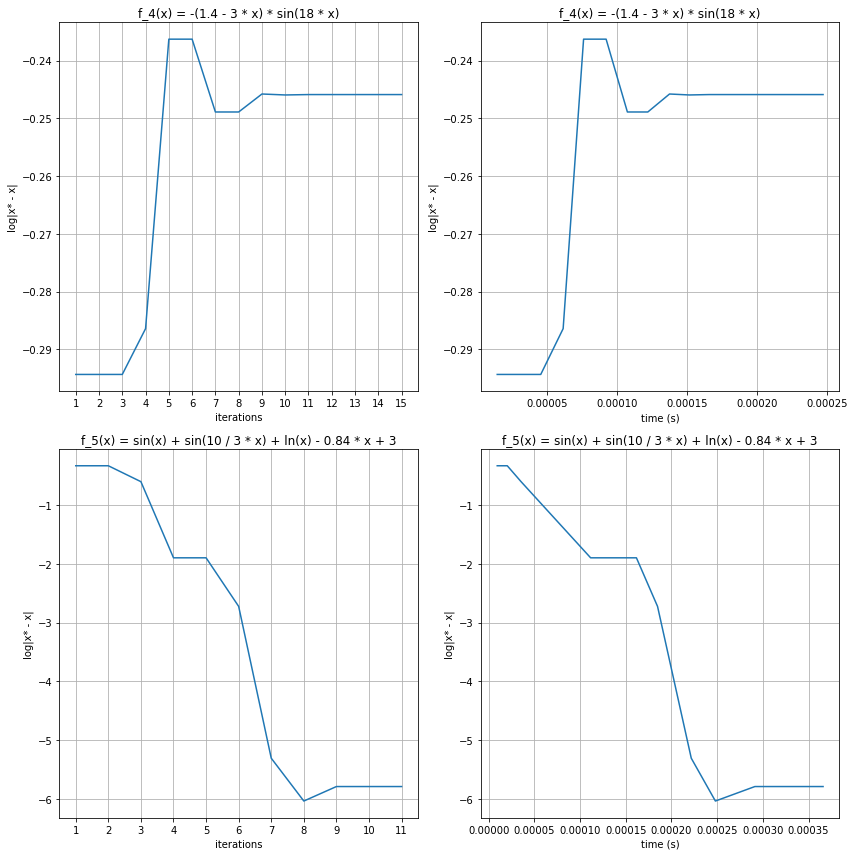

In [5]:
x_true = [0.96609, 5.19978]
log_err = []
iters = []
tms = []
for i in range(sz):
    res = brent(f[i], bounds[i][0], bounds[i][1], x_true[i])
    err, tm = res[1], res[2]
    log_err.append(np.log10(err))
    tms.append(tm)
    iters.append([*range(1, log_err[i].shape[0] + 1)])

f_labels = []
plt.figure(figsize=(12, 12))
for i in range(sz):
    plt.subplot(int(f'{sz}2{2 * i + 1}'))
    plt.plot(iters[i], log_err[i])
    plt.title(f_names[i])
    plt.grid(True)
    plt.xticks(iters[i])
    plt.xlabel('iterations')
    plt.ylabel('log|x* - x|')
    
    
    plt.subplot(int(f'{sz}2{2 * i + 2}'))
    plt.plot(tms[i], log_err[i])
    plt.title(f_names[i])
    plt.grid(True)
    plt.xlabel('time (s)')
    plt.ylabel('log|x* - x|')

plt.tight_layout()
plt.show()

Для второй функции мы сошлись в глобальный минимум, а для первой нет. Посмотрим, что это за точка.

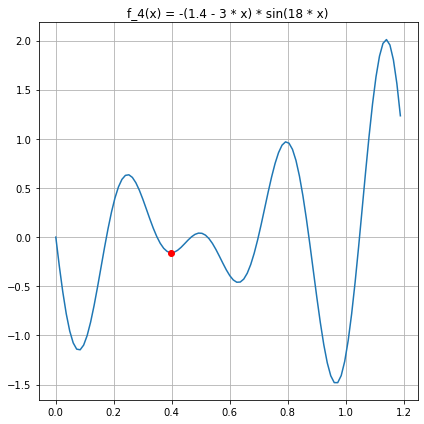

In [6]:
x_ = brent(f[0], bounds[0][0], bounds[0][1], x_true[0])[0]
fx_ = f[0](x_)[0]

plt.figure(figsize=(6, 6))

plt.subplot(111)
plt.plot(x[0], y[0], x_, fx_, 'ro')
plt.title(f_names[0])
plt.grid(True)

plt.tight_layout()
plt.show()

Как и ожидалось, алгоритм нашел точку локального минимума для неунимодальной функции.